In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1: Simulatoin of Ornstein-Uhenbeck process
The purpose of this probelm is to simulate the trajectory of an OU process which solves the SDE:
$$dX_t =(a-X_t) dt +\sigma dW_t$$
Under the condition $X_0=x_0$

#### (a)
Simulate the trajectory of Brownian motion over an interval $[0,T]$ with N discretization points
Numerical application

1. $T = 10$
2. $N = 500$
3. $a = 1$
4. $x_0$ = 5
5. $\sigma = 1$
6. $M = 100$


In [2]:
T = 10
N = 500
a = 1
x_0 = 5
sigma = 1
M = 1000

Text(0.5, 1.0, 'Brownian Motion Sim')

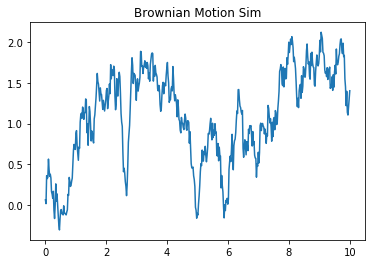

In [15]:
def brownian(t,n,sigma,seed):
    if seed == True:
        np.random.seed(5)
    dt = t/n
    db = np.sqrt(dt)*np.random.normal(0,sigma,n)
    b = np.cumsum(db)
    x_values = np.linspace(0,t,n)
    return b,x_values
sim,x_values = brownian(T,N,sigma,True)
plt.plot(x_values,sim)
plt.title('Brownian Motion Sim')

#### (a) Use the BM trajectory simluated and use Euler schema to simulate trajectory of OU process

In [16]:
def ou_euler(sigma, a,t,n,x_0,seed):
    mu = (a-sigma)
    dw,x_values = brownian(T,n,sigma,seed)
    time = np.arange(0,t,n)
    dt = t/n
    simulated_path = [x_0]
    for i in range(n-1):
        simulated_path.append(simulated_path[i]+(a-simulated_path[i])*dt +sigma*(dw[i+1]-dw[i]))
    return simulated_path,x_values

Text(0.5, 1.0, 'Euler Scheme Estmation of OU')

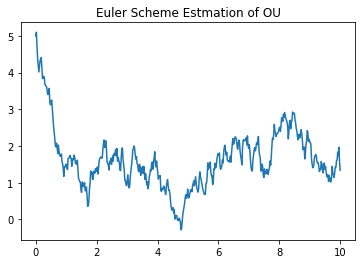

In [22]:
simulated_path,x_values = ou_euler(sigma, a,T,N,x_0,False)
plt.plot(x_values, simulated_path)
plt.title('Euler Scheme Estmation of OU')

Because our $\sigma(t,X_t)$ is or order $C^{1,1}$, the second derivative is zero and hence Milstein and Euler equal.

#### (d) Repeat simulation about $M$ times, use the result to compare the long-term expecation and variance of the OU process

In [32]:
def ou_multidim(sigma, a,t,n,x_0,M):
    time = np.arange(0,t,n)
    dt = t/n
    simulated_path =np.zeros((M,N)) #M rows, N columns
    simulated_path[:,0] = x_0
    for col in range(M):
        dw,x_values = brownian(t,n,sigma,False)
        for row in range(n-1):
            simulated_path[col][row+1]=simulated_path[col][row]+(a-simulated_path[col][row])*dt +sigma*(dw[row+1]-dw[row])
    return simulated_path

In [33]:
simulated_path = ou_multidim(sigma, a,T,N,x_0,M)
print(f'The expectation is {np.mean(simulated_path[:,-1])}')
print(f'The variance is {np.var(simulated_path[:,-1])}')

The expectation is 1.001466633774725
The variance is 0.46760213589519517


The $E[X_t] = a = 1$ and $Var[X_t] = \frac{\sigma^2}{2} = 0.5$. We have nearly these values

## Problem 2

The OU process studied in the previous problem is a common model for interest rates. Another common model is CIR model, which solves the SDE
$$dX_t = (a-X_t)dt +\sigma\sqrt{X_t}dW_t$$
Under the condition X_0=x_0

#### (a) Using the same Brownian trajectory simulated in part(a) of Problem 1, and Euler schema to simulate CIR process. Graph the CIR and OU simulations for the same brownian path

In [25]:
a_n2 = 0.04
x_0_n2 = 0.05
sigma_n2 = .01

In [26]:
def euler_cir(sigma, a,t,n,x_0):
    dw,x_values = brownian(T,n,sigma,True)
    time = np.arange(0,t,n)
    dt = t/n
    simulated_path = [x_0]
    for i in range(n-1):
        simulated_path.append(simulated_path[i]+(a-simulated_path[i])*dt +sigma*np.sqrt(simulated_path[i])*(dw[i+1]-dw[i]))
    return simulated_path,x_values

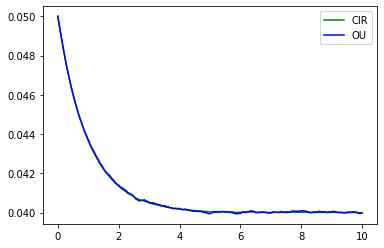

In [27]:
simulated_path_cir,x_values =euler_cir(sigma_n2, a_n2,T,N,x_0_n2)
simulated_path_ou,x_values = ou_euler(sigma_n2, a_n2,T,N,x_0_n2,True)
plt.plot(x_values,simulated_path_cir,'green',label='CIR')
plt.plot(x_values,simulated_path_ou,'blue',label='OU')
plt.legend()

#### (b) Repeat (a) for Milstein

In [28]:
def milstein_cir(sigma, a,t,n,x_0):
    dw,x_values = brownian(T,n,sigma,True)
    dt = t/n
    simulated_path = [x_0]
    for i in range(n-1):
        second_order = .5*(sigma*np.sqrt(simulated_path[i]))*(.5*sigma*(simulated_path[i]**(-.5)))*(((dw[i+1]-dw[i])**2)-dt)
        simulated_path.append(simulated_path[i]+(a-simulated_path[i])*dt +sigma*np.sqrt(simulated_path[i])*(dw[i+1]-dw[i])+second_order)
    return simulated_path,x_values

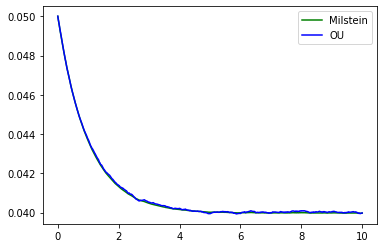

In [29]:
simulated_path_milstein,x_values =milstein_cir(sigma_n2, a_n2,T,N,x_0_n2)
plt.plot(x_values,simulated_path_milstein,'green',label='Milstein')
plt.plot(x_values,simulated_path_ou,'blue',label='OU')
plt.legend()

#### (c) Repeat the simulation above using M-large, for a large value of T, and use the result to estimate the long-term expectation and var of the CIR process. How do they compare to the ones of the OU process.

In [30]:
def cir_milstein_multidim(sigma, a,t,n,x_0,M):
    dt = t/n
    simulated_path =np.zeros((M,N)) #M rows, N columns
    simulated_path[:,0] = x_0
    for col in range(M):
        dw,x_values = brownian(t,n,sigma,False)
        for row in range(n-1):
            second_order = .5*(sigma*np.sqrt(simulated_path[col][row]))*(.5*sigma*(1/np.sqrt(simulated_path[col][row])))*(((dw[row+1]-dw[row])**2)-dt)
            simulated_path[col][row+1]=simulated_path[col][row]+(a-simulated_path[col][row])*dt +sigma*(dw[row+1]-dw[row])+second_order
    return simulated_path

In [35]:
simulated_path_CIR_milstein = cir_milstein_multidim(sigma_n2, a_n2,T,N,x_0_n2,M)
simulated_path_ou_c = ou_multidim(sigma_n2, a_n2,T,N,x_0_n2,M)
print(f'The expectation of OU: {np.mean(simulated_path_ou_c[:,-1])}')
print(f'The variance of OU: {np.var(simulated_path_ou_c[:,-1])}')
print(f'The expectation using Milstein to sim CIR: {np.mean(simulated_path_CIR_milstein[:,-1])}')
print(f'The variance using Milstein to sim CIR: {np.var(simulated_path_CIR_milstein[:,-1])}')

The expectation of OU: 0.04000273267572963
The variance of OU: 5.238703915795848e-09
The expectation using Milstein to sim CIR: 0.03997442919912078
The variance using Milstein to sim CIR: 4.847084941071037e-09


The variance on the CIR is less than that of the OU

#### (d) If you use large values when implementing Euler for CIR, an error may occur. Explain why?

## Problem 3

Solve the following PDE using numerical simulation:
$$\begin{cases}
\frac{df}{dt}(t,x) = (1-x)\frac{df}{dx} + \frac{1}{2}\frac{d^2 f}{dx^2}\\
f(0,x) = cos(\pi x)
\end{cases}$$

#### (a) Use the technique presented to represent the solution $f(t,x)$ as an expectation w.r.t. a stochastic process. Identify the process explicity

We begin by changing the inital condition to a terminal condition and then apply Feynman-Kac Formula where $g(t,x) = f(T-t,x)$
$$\begin{cases}
\frac{dg}{dt}(t,x) +(1-x)\frac{dg}{dx} + \frac{1}{2}\frac{d^2 g}{dx^2} = 0\\
g(T,x) = cos(\pi x)
\end{cases}$$

$$f(t,x)= g(T-t,x)=E[cos(\pi W_T)|W_{T-t}=x]=E[cos(\pi W_t)|W_0=x]$$

#### (b) Use repeated simulations of the process in (a) to approximate the values of $f(t,x)$ for $t=0.2$ and $20$ discrete points in the interval $[-1,1]$. Produce the graph of the solution

In [52]:
t_p3=0.2
n_p3 = 20
begin,end = -1,1
n_paths = 100

In [53]:
discrete_pts= np.linspace(begin,end,n_p3)
discrete_pts

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [341]:
def brownian_p3(t_p3,n_p3,x0):
    dt = t_p3/n_p3
    dw = np.random.normal(0,1,n_p3)
    path_p3 = x0+np.cumsum(dw)
    return path_p3

In [174]:
test = brownian_p3(t_p3,n_p3,discrete_pts[4])
test

array([0.8634903 , 0.89475499, 1.11356514, 0.49964628, 2.12901043,
       3.7207412 , 3.72761319, 4.73929292, 3.87531499, 4.43741156,
       2.44416024, 1.6508316 , 1.22208156, 2.56108014, 5.00902208,
       6.15488888, 5.76714826, 5.54959766, 4.30435639, 4.8821009 ])

In [347]:
def sim_p3(t_p3,n_p3,n_paths):
    discrete_pts= np.linspace(begin,end,n_p3)
    dt = t_p3/n_p3 #M rows, N columns
    avgs = []
    simulated_path = np.zeros((n_paths,n_p3))
    for pts in range(len(discrete_pts)):
        simulated_path[:,0]=discrete_pts[pts]
        path_p3 = brownian_p3(t_p3,n_p3,discrete_pts[pts])
        for sims in range(n_p3):
            simulated_path[pts,sims]=np.cos(np.pi*discrete_pts[pts])
        avgs.append(np.mean(simulated_path[:,-1]))
    return avgs

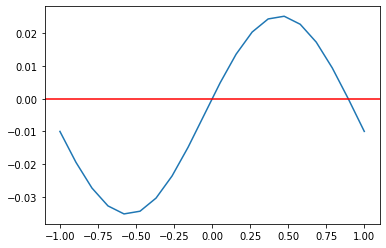

In [354]:
plt.plot(list(np.linspace(begin,end,n_p3)),sim_p3(t_p3,n_p3,n_paths))
plt.axhline(0,color='red')